<img src="./img/metro_madrid.jpg" alt="drawing" width="500"/>

# Transporte y renta en la Comunidad de Madrid

### TEMA

Este proyecto busca arrojar luz sobre los patrones de comportamiento en el transporte de los ciudadanos de la Comunidad de Madrid, estudiando posibles vínculos con su renta. Para ello, se utiliza la [Encuesta de Movilidad del Consorcio Regional](https://datos.comunidad.madrid/dataset/resultados-edm2018) de Transportes de Madrid (CRTM), realizada en el 2018.

Para los cálculos de la renta, se utilizan diferentes tablas extraídas de la [Encuesta de Condiciones de Vida](https://ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176807&menu=ultiDatos&idp=1254735976608) del INE, para el año 2018

### HIPÓTESIS

La hipótesis principal de este proyecto es que **existe una relación entre la renta y el uso del transporte en la Comunidad de Madrid**. En concreto, se buscará contrastar:
+ Si las rentas más altas eligen el coche como primera opción para desplazamientos laborales y por placer.
+ Las rentas bajas, para trabajar, utilizan más el transporte público que el coche.
+ Las mujeres utilizan más el transporte público para desplazamientos laborales, sin tener en cuenta la renta.
    + Lo que, unido al segundo punto, explicaría que las mujeres no usan más el transporte público por deseo sino por necesidad.
+ Los hombres utilizan más el transporte privado para desplazamientos por placer


### SUPUESTOS
Dados los datos utilizados, hemos de tener en cuenta varios puntos:
+ Se está utilizando la última encuesta publicada por el CRTM (en serio).
    + Sí se cuentan con los datos de uso del Metro de Madrid, que en 2023 volvieron a niveles pre-pandemia. Por tanto, podemos suponer que no han cambiado las pautas de comportamiento en un nivel agregado
+ No contamos con la renta de los encuestados. Para ello generaremos un dato *proxy*, que estimaremos en función de las condiciones socioeconómicas de los encuestados (edad, ocupación, género, grado de educación, y si cuenta con coche).
    + Renta != Riqueza. Estimaremos la cantidad de **generar** , no de **poseer**. Una persona sin trabajo pero con patrimonio no quedará reflejada en este estudio.
    + Por disponibilidad de los datos, se utilizarán las medias de las rentas. En función de disponibilidad de los datos, es posible que se recoja la media española en lugar de la de la Comunidad de Madrid.
+ Los datos sólo tienen en cuenta días estrictamente laborales (Lunes-Jueves)
+ Si bien no tiene impacto a primera vista sobre las hipótesis, se realizará un estudio de impacto de la **meteorología** sobre el uso de unos u otros medios transportes.


## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

In [2]:
import hashlib
import requests
import datetime
import pandas as pd
import numpy as np

In [30]:

### TODO: Pasar las Aux a utils
### Importar openpyxl
# guarda en variables los datasets y su fuente
# df_transpk = pd.DataFrame(pd.read_csv("./data/raw/kaggle_public_transp.csv"))
# fuente_1a = "https://www.kaggle.com/datasets/dataguapa/madrid-public-transportation-data-2018"

### MAIN

df_transp_ind = pd.DataFrame(pd.read_excel("./data/raw/EDM2018INDIVIDUOS.xlsx", sheet_name = 'INDIVIDUOS'))
fuente_1 = "https://datos.comunidad.madrid/dataset/resultados-edm2018"

df_transp_trp = pd.DataFrame(pd.read_excel("./data/raw/EDM2018VIAJES.xlsx", sheet_name = 'VIAJES'))
fuente_1 = "https://datos.comunidad.madrid/dataset/resultados-edm2018"


### AUX

df_hogares = pd.DataFrame(pd.read_csv("./data/raw/ine_gasto_hogares.csv", sep=";"))
fuente_2 = "https://www.ine.es/jaxiT3/Tabla.htm?t=24900"

df_ingresos = pd.DataFrame(pd.read_csv("./data/raw/ine_madrid_fuentes_ingreso.csv",sep=";"))
fuente_3 = "https://ine.es/jaxiT3/Tabla.htm?t=53687"

df_renta_es = pd.DataFrame(pd.read_csv("./data/raw/ine_renta_edad_sexo.csv",encoding='latin1',sep=";"))
fuente_4 = "https://ine.es/jaxiT3/Tabla.htm?t=9942"

df_educacion = pd.DataFrame(pd.read_excel("./data/raw/ine_renta_educacion.xlsx", sheet_name="educación",skiprows=2,index_col=0,nrows=5)) ### Terminar de apañar
fuente_5 = "https://ine.es/ss/Satellite?c=INESeccion_C&cid=1259944504067&p=1254735110672&pagename=ProductosYServicios%2FPYSLayout&param1=PYSDetalleFichaIndicador&param3=1259937499084"

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df_transp = pd.DataFrame(pd.read_csv("./data/treated/transp.csv"))

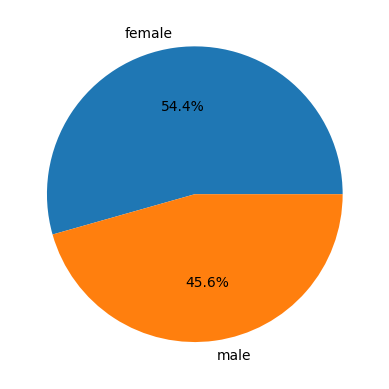

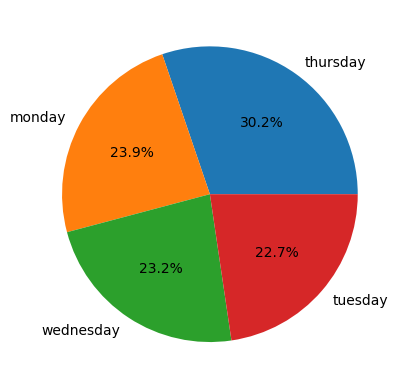

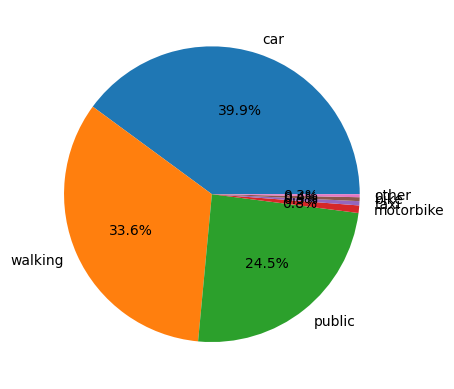

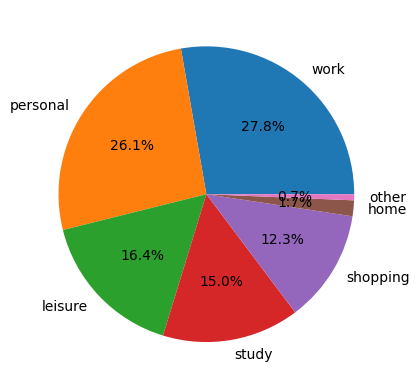

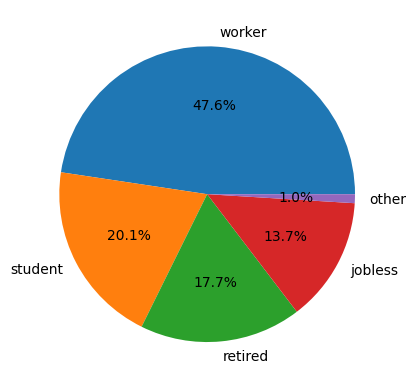

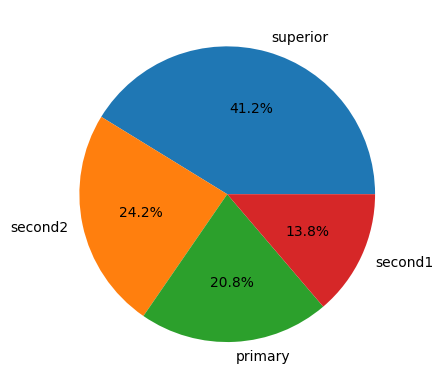

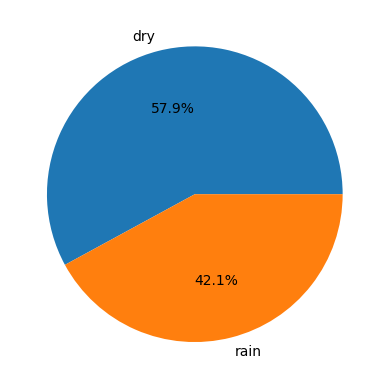

In [73]:
### Generate pie charts for the variables contained in pies
pies = ['gender','week_day','transport','reason','activity','studies','weather']
for pie in pies:
    plt.figure()
    plt.pie(df_transp[pie].value_counts().values, labels = df_transp[pie].value_counts().index,autopct='%1.1f%%')
    plt.savefig("./img/plots/"+pie+"_distrib.png")


In [71]:
df_transp['weather'] = np.where(df_transp['prec'] < 0.1,"dry","rain")
df_transp['weather'].value_counts()

weather
dry     129034
rain     93710
Name: count, dtype: int64

In [78]:
df_transp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222744 entries, 0 to 222743
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_indiv    222744 non-null  int64  
 1   id_trip     222744 non-null  int64  
 2   start_trip  222744 non-null  int64  
 3   transport   222744 non-null  object 
 4   freq        222744 non-null  int64  
 5   reason      222744 non-null  object 
 6   distance    222744 non-null  float64
 7   trip_pond   222744 non-null  float64
 8   gender      222744 non-null  object 
 9   age         222744 non-null  int64  
 10  spanish     222744 non-null  int64  
 11  studies     222744 non-null  object 
 12  activity    222744 non-null  object 
 13  day         222744 non-null  int64  
 14  month       222744 non-null  int64  
 15  year        222744 non-null  int64  
 16  week_day    222744 non-null  object 
 17  datemerge   222744 non-null  object 
 18  tmed        222744 non-null  float64
 19  prec   

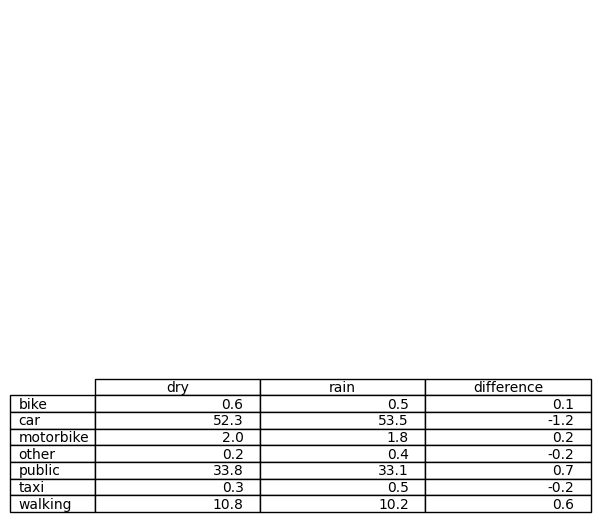

In [118]:
### Study on possible pattern changes of people changing their selection of transportation due
### to rain when they go to work.
from pandas.plotting import table 
dry_work_filter = (df_transp['weather']=="dry") & (df_transp['reason']=="work")
rain_work_filter = (df_transp['weather']=="rain") & (df_transp['reason']=="work")
dry_work = round(df_transp[dry_work_filter].groupby('transport')["id_indiv"].count()/len(df_transp[dry_work_filter])*100,1)
rain_work = round(df_transp[rain_work_filter].groupby('transport')["id_indiv"].count()/len(df_transp[rain_work_filter])*100,1)
weather_work = pd.concat([dry_work,rain_work],axis=1,keys=["dry","rain"])
weather_work['difference'] = round(weather_work['dry']-weather_work['rain'],1)
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax,weather_work)
# plt.table(weather_work)


In [90]:
df_transp[dry_work_filter]

,id_indiv,id_trip,start_trip,transport,freq,reason,distance,trip_pond,gender,age,...,studies,activity,day,month,year,week_day,datemerge,tmed,prec,weather
0,1891,18911,800,car,1,work,6.660582,66.304668,male,28,...,second2,worker,25,4,2018,wednesday,2018-4-25,20.8,0.0,dry
1,1891,18912,1800,car,1,work,6.660582,66.304668,male,28,...,second2,worker,25,4,2018,wednesday,2018-4-25,20.8,0.0,dry
2,2441,24411,800,car,1,work,6.586497,66.304668,male,36,...,second2,worker,26,4,2018,thursday,2018-4-26,20.2,0.0,dry
3,2441,24412,1800,car,1,work,6.586497,66.304668,male,36,...,second2,worker,26,4,2018,thursday,2018-4-26,20.2,0.0,dry
12,4143,41431,841,car,1,work,0.695542,67.585759,male,30,...,second2,worker,26,4,2018,thursday,2018-4-26,20.2,0.0,dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222738,60111371,601113712,1030,car,2,work,2.633570,46.428103,male,38,...,superior,worker,4,6,2018,monday,2018-6-4,16.2,0.0,dry
222739,60111371,601113713,1243,car,1,work,0.708580,46.428103,male,38,...,superior,worker,4,6,2018,monday,2018-6-4,16.2,0.0,dry
222740,60111371,601113714,1530,car,1,work,3.237211,46.428103,male,38,...,superior,worker,4,6,2018,monday,2018-6-4,16.2,0.0,dry
222742,60111371,601113716,1930,car,4,work,3.893271,46.428103,male,38,...,superior,worker,4,6,2018,monday,2018-6-4,16.2,0.0,dry
